<a href="https://colab.research.google.com/github/Tomoyuki0223/machine_learning_question/blob/main/kadai4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [449]:
!pip install japanize-matplotlib

In [450]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
import matplotlib.animation
import matplotlib.colors
from IPython.display import HTML

In [451]:
def plot_graph(X, Y, x, y):
    fig, ax = plt.subplots(dpi=100)
    ax.set_xlim(0, 1)
    ax.set_ylim(-1, 1)
    ax.grid()
    ax.scatter(X, Y, marker='.')
    ax.plot(x, y, 'r')
    fig.show()

# (1)(2) 反復式：リッジ回帰モデル

In [452]:
#  J(ω) = L(ω) + αR(ω)
#          Σ{(yi - xi.T * ω)^2 + α||ω||^2/N}
#  よって、ω(t+1) = (1 - 2αη/N)ω(t) - 2η(yi_hat - yi)xi
#  ω(t)の前に重みを減衰させる係数が現れる

#（3）リッジ回帰の実装

In [453]:
x_T = np.array([ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ])
y_T = np.array([-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08])
x = x_T.reshape(-1, 1) #列ベクトルに変換
y = y_T.reshape(-1, 1) #列ベクトルに変換

In [454]:
eta0 = 100
eps = 1e-4

In [455]:
X = np.concatenate([x**3, x**2, x, np.ones_like(x)], axis=1)
w = np.zeros(4)
alfa = 1e-3
N = X.shape[0]

In [456]:
while True:
    eta = eta0 / np.sqrt(1+t)
    i = np.random.randint(0, X.shape[0])
    y_hat = np.dot(X[i], w)
    grad = 2 * (y_hat - y[i]) * X[i]
    if np.sum(np.abs(grad)) < eps:
        break
    omomi = 1 - (2 * alfa * eta / N)
    w = omomi * w - eta * grad

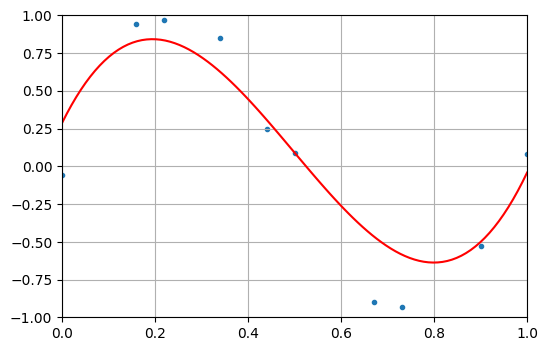

In [457]:
x_plot = np.linspace(0, 1, 100)
y_hat_final = np.polyval(w,x_plot)
plot_graph(x, y, x_plot, y_hat_final)